In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv("final.csv", sep="\t")
df = df[df["view"] > 1e6]
len(df)

4325

In [3]:
df.columns

Index(['track', 'track_id', 'artist', 'album', 'sp_release_date', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'playcount', 'video_id', 'view', 'channelTitle',
       'yt_release_date', 'title', 'genres'],
      dtype='object')

In [11]:
df.head()

0    234
1    202
2    209
3    218
4    174
Name: duration, dtype: int64

In [5]:
df["duration"] = df["duration"].apply(lambda x : sum(mul * int(x) for mul, x in zip([60, 1], x.split(":"))))

In [12]:
df["duration"].head()

0    234
1    202
2    209
3    218
4    174
Name: duration, dtype: int64

In [6]:
pearson_view = {}
pearson_playcount = {}
spearman_view = {}
spearman_playcount = {}
feature = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in feature:
	pearson_playcount[col] = df['playcount'].corr(df[col], method='pearson')
	pearson_view[col] = df['view'].corr(df[col], method='pearson')
	spearman_view[col] = df['view'].corr(df[col], method='spearman')
	spearman_playcount[col] = df['playcount'].corr(df[col], method='spearman')

corr = pd.DataFrame(columns=feature)
corr = corr.append(pearson_playcount, ignore_index=True)
corr = corr.append(pearson_view, ignore_index=True)
corr = corr.append(spearman_playcount, ignore_index=True)
corr = corr.append(spearman_view, ignore_index=True)
corr['type'] = ['pearson_playcount', 'pearson_view', 'spearman_playcount', 'spearman_view']
corr = corr.set_index("type")
corr.head()


,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
type,,,,,,,,
pearson_playcount,0.070252,-0.058592,0.027345,-0.009637,-0.056353,-0.038092,-0.002611,-0.038236
pearson_view,0.101920,0.074197,0.147606,-0.004749,-0.057717,-0.011220,0.083206,-0.010398
spearman_playcount,0.066296,-0.055096,0.011375,0.010480,-0.082341,-0.033717,0.024930,-0.034685
spearman_view,0.130799,0.119751,0.206022,0.071450,-0.090487,-0.001046,0.084188,0.014590


<AxesSubplot:ylabel='type'>

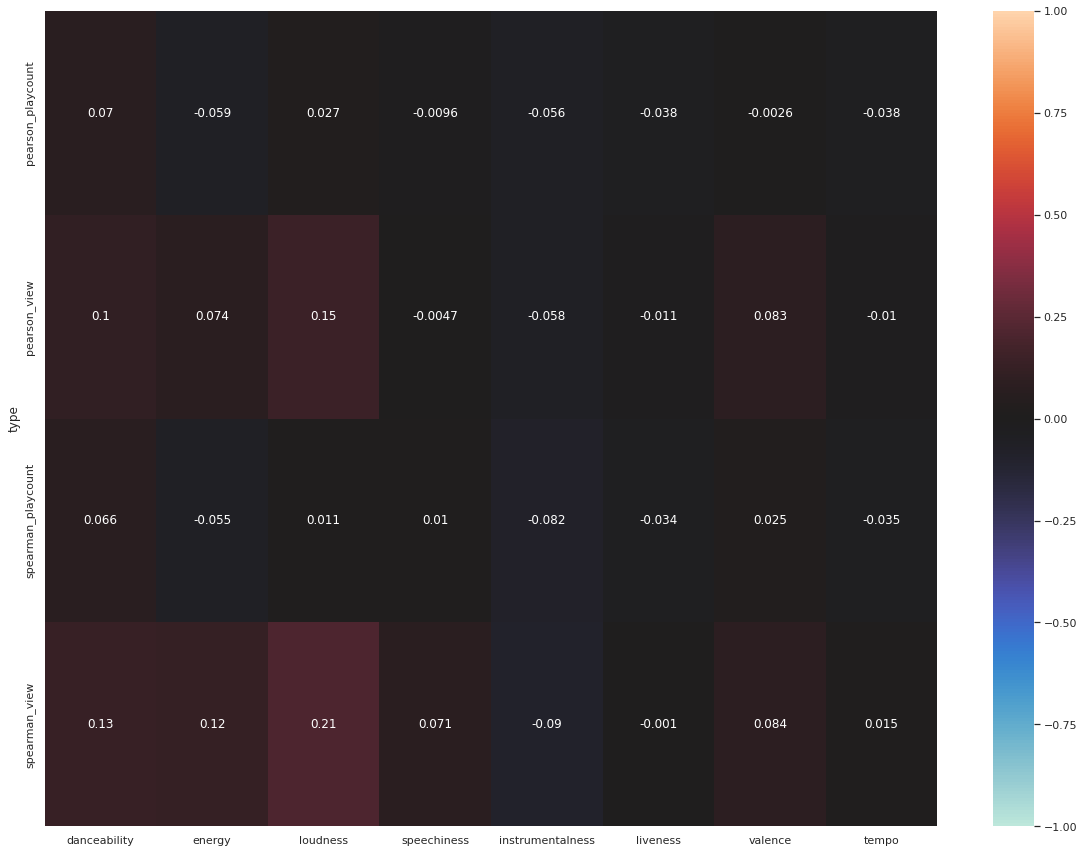

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, center=0)

In [8]:
stat_dict = {}
for f in feature:
    stat_dict[f] = {}

for f in feature:
    mean = df[f].mean(axis = 0)
    stat_dict[f]['mean'] = mean
    #print(mean)
    variance = df[f].var(axis = 0)
    stat_dict[f]['variance'] = variance
    #print(variance)
    skewness = df[f].skew(axis = 0)
    stat_dict[f]['skewness'] = skewness
    #print(skewness)
    kurtosis = df[f].kurt(axis = 0)
    stat_dict[f]['kurtosis'] = kurtosis

    #print(kurtosis)

In [9]:
stat_dict

{'danceability': {'mean': 0.643565549132948,
  'variance': 0.023000080635249956,
  'skewness': -0.41216955709537234,
  'kurtosis': -0.22989374699266607},
 'energy': {'mean': 0.6695136647398844,
  'variance': 0.03207256732710775,
  'skewness': -0.595295913848817,
  'kurtosis': -0.013727818866306585},
 'loudness': {'mean': -6.340067283236993,
  'variance': 7.225663083584777,
  'skewness': -1.5271960848203223,
  'kurtosis': 4.8411458474139195},
 'speechiness': {'mean': 0.09841442774566474,
  'variance': 0.00900702248374391,
  'skewness': 2.120501336805909,
  'kurtosis': 4.9956143581550245},
 'instrumentalness': {'mean': 0.02023659661965318,
  'variance': 0.010313162137471396,
  'skewness': 6.449379280877818,
  'kurtosis': 43.952868201429304},
 'liveness': {'mean': 0.17832984971098265,
  'variance': 0.019797356534783143,
  'skewness': 2.215932208759496,
  'kurtosis': 5.9422995863148245},
 'valence': {'mean': 0.5087018959537571,
  'variance': 0.05242596067633052,
  'skewness': 0.05804216556

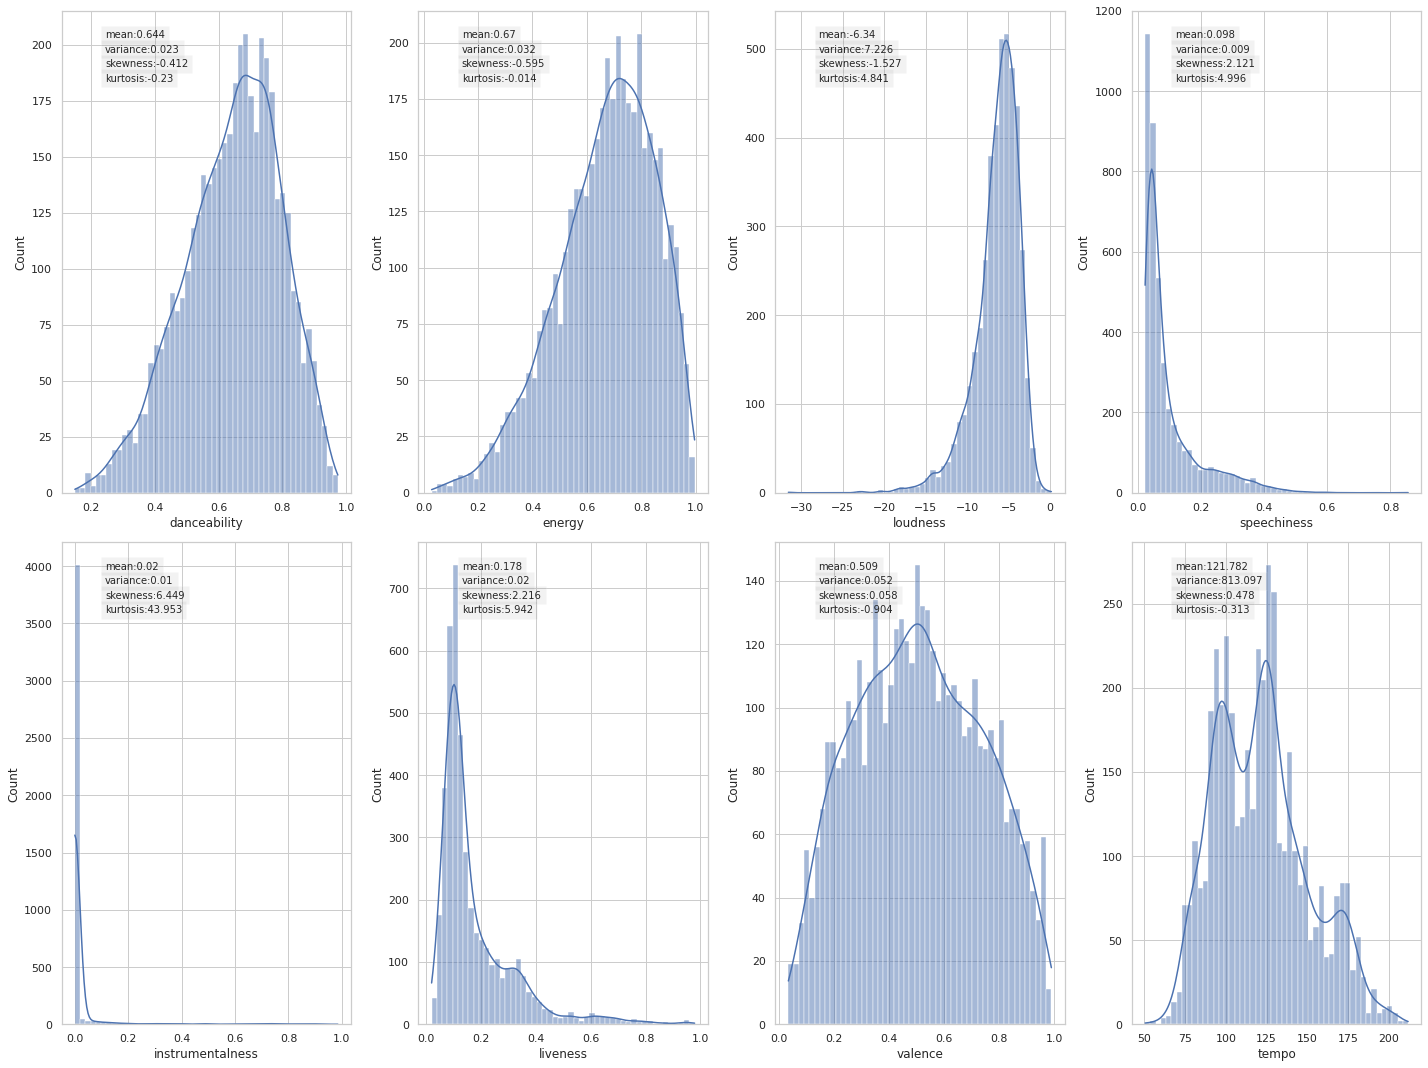

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for i in range(len(feature)):
    if i < 4:
        row = 0
    else:
        row = 1
    col = i % 4
    for j, key in enumerate(stat_dict[feature[i]].keys()):
        ax[row, col].text(0.15, 0.95 - j * 0.03, '{}:{}'.format(key, round(stat_dict[feature[i]][key], 3)), size=10,
                          verticalalignment='center', transform=ax[row, col].transAxes, bbox=dict(facecolor='grey', alpha=0.1))
    sns.histplot(data=df, x=feature[i], ax=ax[row, col], kde=True, bins=50)
fig.tight_layout()


In [12]:
df['playcount'].corr(df['view'], method='spearman')

0.5575112979212782

<AxesSubplot:xlabel='playcount', ylabel='view'>

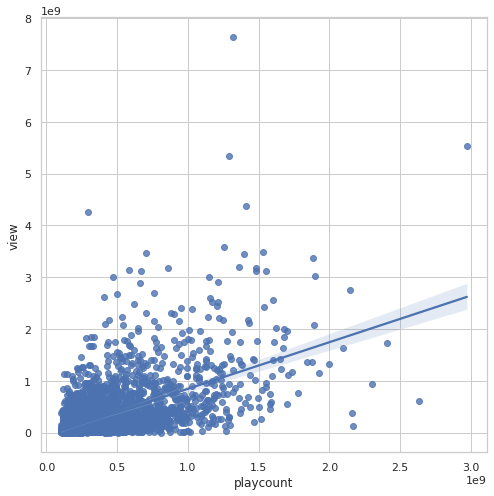

In [13]:
f, ax = plt.subplots(figsize=(8, 8))
sns.regplot(data=df, x="playcount", y="view", ax=ax)

In [79]:
bins = pd.IntervalIndex.from_tuples([(0, 2e8), (2e8, 3e8), (3e8, 4e8), (4e8, 5e8), (5e8, 7.5e8), (7.5e8, 1e9), (1e9, 3e9)])
df["bins"] = pd.cut(df["playcount"], bins)

In [84]:
pop_dist_0 = df[df["mode"] == 0].groupby("bins")[["playcount"]].count()
pop_dist_1 = df[df["mode"] == 1].groupby("bins")[["playcount"]].count()
pop_dist = pd.DataFrame()
pop_dist["0"] = pop_dist_0['playcount']
pop_dist["1"] = pop_dist_1['playcount'].apply(lambda x: 0 - x)
pop_dist = pop_dist.reset_index()

In [85]:
pop_dist

,bins,0,1
0,"(0.0, 200000000.0]",636,-926
1,"(200000000.0, 300000000.0]",393,-662
2,"(300000000.0, 400000000.0]",228,-347
3,"(400000000.0, 500000000.0]",157,-233
4,"(500000000.0, 750000000.0]",175,-288
5,"(750000000.0, 1000000000.0]",91,-124
6,"(1000000000.0, 3000000000.0]",82,-108


Text(0.5, 0, 'bruh')

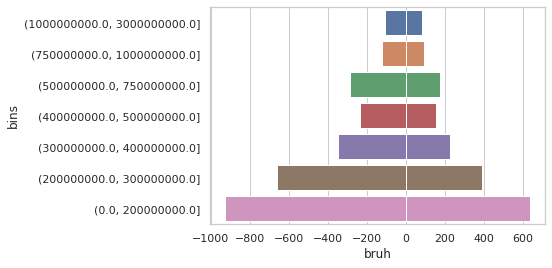

In [86]:
sns.barplot(x="0", y="bins", data=pop_dist, order=bins[::-1])
sns.barplot(x="1", y="bins", data=pop_dist, order=bins[::-1])
plt.xlabel("bruh")

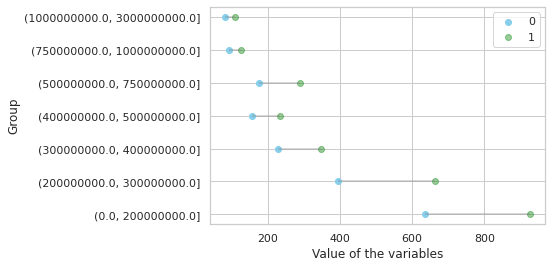

In [88]:
pop_dist_0 = df[df["mode"] == 0].groupby("bins")[["playcount"]].count()
pop_dist_1 = df[df["mode"] == 1].groupby("bins")[["playcount"]].count()
pop_dist = pd.DataFrame()
pop_dist["0"] = pop_dist_0['playcount']
pop_dist["1"] = pop_dist_1['playcount']
pop_dist = pop_dist.reset_index()
my_range=range(1,len(pop_dist.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=pop_dist['0'], xmax=pop_dist['1'], color='grey', alpha=0.4)
plt.scatter(pop_dist['0'], my_range, color='skyblue', alpha=1, label='0')
plt.scatter(pop_dist['1'], my_range, color='green', alpha=0.4 , label='1')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, pop_dist['bins'])
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

In [ ]:
print(df.groupby('explicit')['track_id'].count())
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='explicit', ax=ax)
f.tight_layout()

In [ ]:
sns.barplot(data=df, x='',y='playcount',
            hue='mode',orient='horizontal', 
            dodge=False)

<AxesSubplot:xlabel='key', ylabel='playcount'>

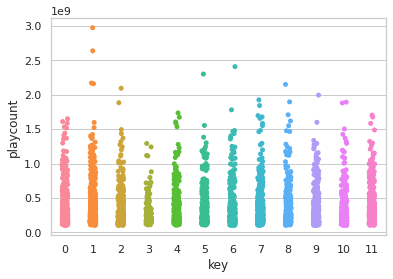

In [37]:
sns.stripplot(x="key", y="playcount", data=df)

[Text(0.5, 0, 'Key'), Text(0, 0.5, 'Youtube Views')]

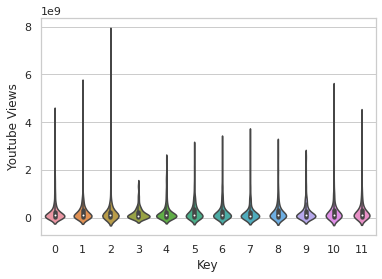

In [34]:
ax = sns.violinplot(x="key", y="view", data=df)
ax.set(xlabel='Key', ylabel='Youtube Views')

<AxesSubplot:xlabel='key', ylabel='view'>

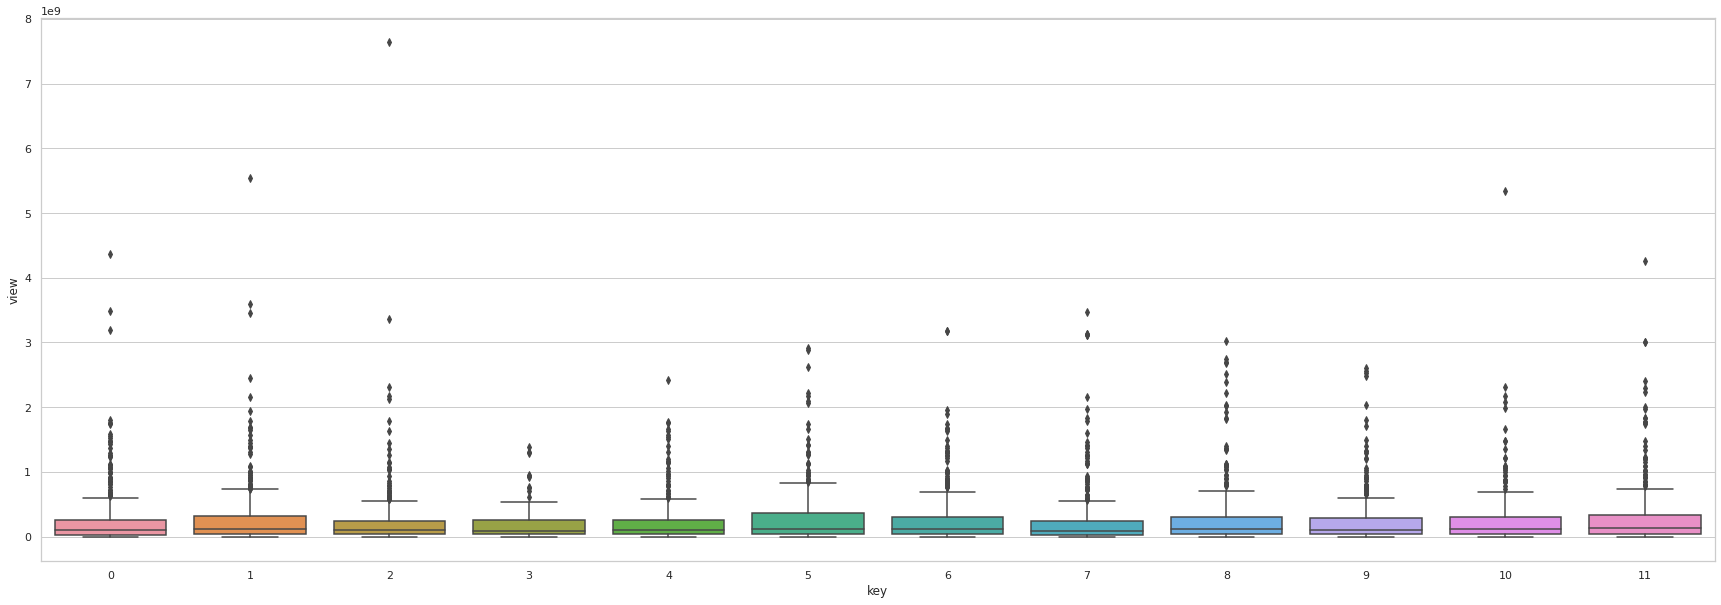

In [32]:
plt.figure(figsize=(30, 10))
sns.boxplot(y="view", x="key", data=df)

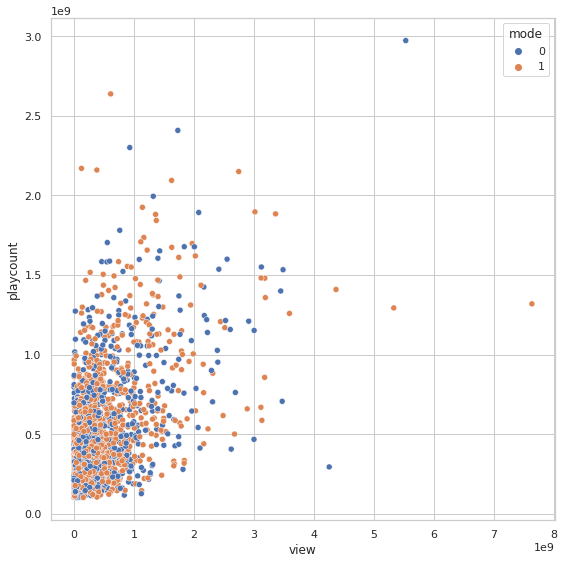

In [24]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='mode', ax=ax)
f.tight_layout()

explicit
False    3166
True     1284
Name: track_id, dtype: int64


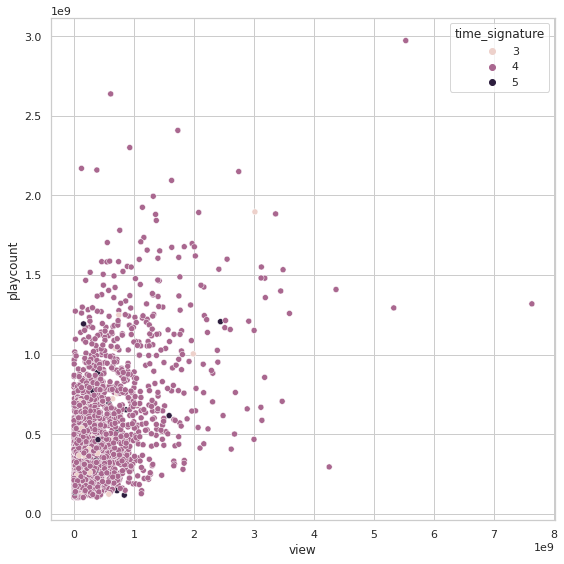

In [22]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='time_signature', ax=ax)
f.tight_layout()

explicit
False    3166
True     1284
Name: track_id, dtype: int64


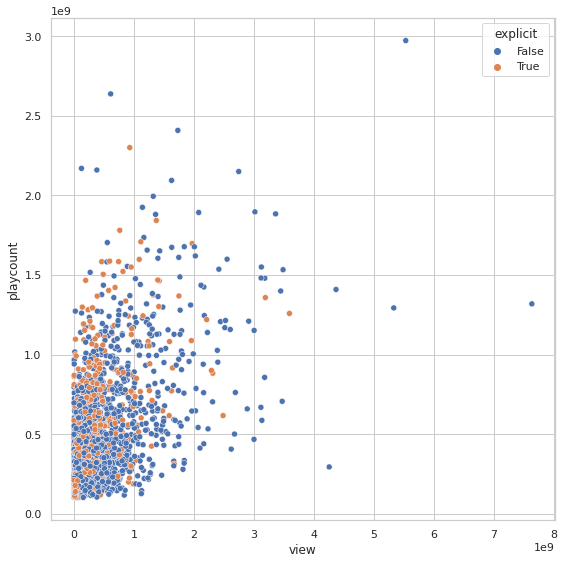

In [23]:
print(df.groupby('explicit')['track_id'].count())
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='explicit', ax=ax)
f.tight_layout()

In [7]:
print(stat_dict)

{'danceability': {'mean': 0.6445952808988765, 'variance': 0.02303677323014135, 'skewness': -0.4226081895655336, 'kurtosis': -0.2040372673400319}, 'energy': {'mean': 0.666217191011236, 'variance': 0.03244375571474211, 'skewness': -0.5869892476266748, 'kurtosis': -0.01880509691390575}, 'loudness': {'mean': -6.3965148314606735, 'variance': 7.470373592609827, 'skewness': -1.5692200009326622, 'kurtosis': 5.070683773633162}, 'speechiness': {'mean': 0.09945355056179776, 'variance': 0.009321166340503735, 'skewness': 2.1340124772589135, 'kurtosis': 5.134793609608989}, 'instrumentalness': {'mean': 0.0203947591752809, 'variance': 0.01040624358970532, 'skewness': 6.442514993396072, 'kurtosis': 43.926240760076524}, 'liveness': {'mean': 0.17848341573033707, 'variance': 0.019738732496309485, 'skewness': 2.208640265750662, 'kurtosis': 5.891380371351641}, 'valence': {'mean': 0.5068149438202247, 'variance': 0.05272177941475297, 'skewness': 0.05794687098109463, 'kurtosis': -0.9035895730448837}, 'tempo': 

In [10]:
explicit = pd.DataFrame().append(df.groupby("explicit")["track_id"].count())

In [11]:
explicit.head()

,False,True
track_id,3166.0,1284.0


<AxesSubplot:xlabel='explicit', ylabel='count'>

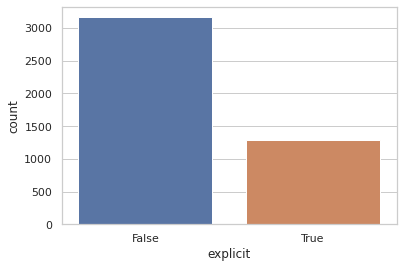

In [17]:
sns.countplot(x="explicit", data=df, order=df['explicit'].value_counts().index)

<AxesSubplot:xlabel='key', ylabel='count'>

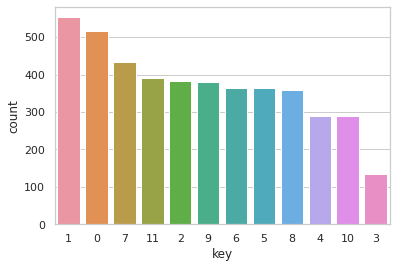

In [18]:
sns.countplot(x="key", data=df, order=df['key'].value_counts().index)

<AxesSubplot:xlabel='time_signature', ylabel='count'>

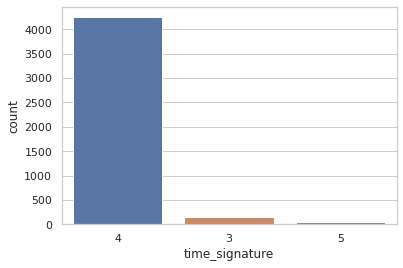

In [19]:
sns.countplot(x="time_signature", data=df, order=df['time_signature'].value_counts().index)

<AxesSubplot:xlabel='mode', ylabel='count'>

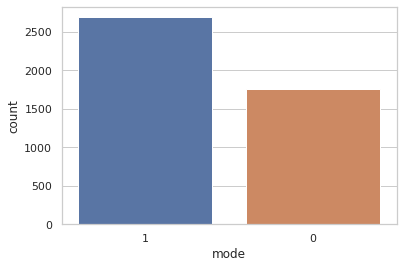

In [20]:
sns.countplot(x="mode", data=df, order=df['mode'].value_counts().index)

In [11]:
len(df[df["playcount"] < 500000000])

3591

In [12]:
len(df[df["view"] < 500000000])

3832

In [13]:
best = df[df['playcount'] > 500000000]
best = best[best['view'] > 500000000]

In [14]:
worst = pd.concat([best, df]).drop_duplicates(keep=False)

In [15]:
worst.describe

<bound method NDFrame.describe of                                             track                track_id  \
4                                       One Dance  1xznGGDReH1oQq0xzbwXa3   
10                              Someone You Loved  2TIlqbIneP0ZY1O0EzYLlc   
27                                  XO TOUR Llif3  2eMwDehkIC1j68U6FA3Eiq   
34                                     Better Now  7dt6x5M1jzdTEt8oCbisTK   
74    Light It Up (feat. Nyla & Fuse ODG) - Remix  6lDo13SSgTv0WbyUQKgnjk   
...                                           ...                     ...   
4455                                   Easy On Me  0gplL1WMoJ6iYaPgMCL0gX   
4456                              Wrong Direction  5Qsp8mtshe70DX7EYbWZGo   
4457                                 I Love You's  60todhJq1ScRkVxFvXTuZF   
4458                                Girls Like Us  5SFXOMJJ334Wn2PwBHeRZN   
4459      m y . l i f e (with 21 Savage & Morray)  1D3z6HTiQsNmZxjl7F7eoG   

                artist                   

In [16]:
df["sp_release_date"].head()

0    2017-01-06
1    2019-11-29
2    2019-08-29
3    2017-09-15
4    2016-05-06
Name: sp_release_date, dtype: object

In [17]:
df["sp_release_date"] =  pd.to_datetime(df['sp_release_date'], format='%Y-%m-%d')

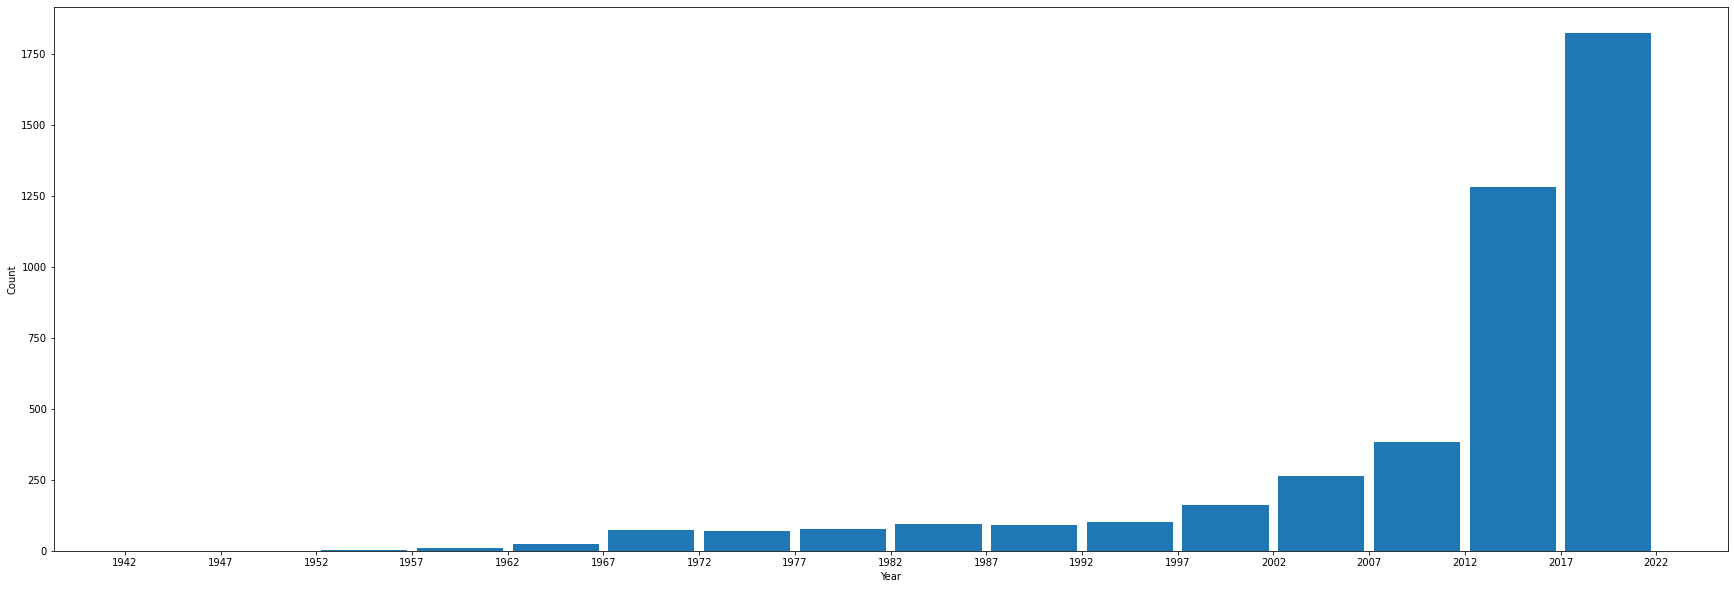

In [24]:
import numpy as np
plt.figure(figsize=(30, 10))
data = df["sp_release_date"]
data = [t.year for t in data]
number = np.arange(min(data), max(data) + 5, 5)
label = map(lambda x: str(x), number)
plt.hist(data, bins=number, rwidth=0.9)
plt.xticks(number, label)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [64]:
first_chunk = df[df["sp_release_date"].apply(lambda x : x.year < 1980)]

In [68]:
second_chunk = df[df["sp_release_date"].apply(lambda x : 1980 <= x.year < 1990)]

In [71]:
third_chunk = df[df["sp_release_date"].apply(lambda x : 1990 <= x.year < 2000)]
len(third_chunk)

222

In [72]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2000 <= x.year < 2010)]
len(forth_chunk)

521

In [74]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2010 <= x.year < 2015)]
len(forth_chunk)

780

In [75]:
fifth_chunk = df[df["sp_release_date"].apply(lambda x : 2015 <= x.year)]
len(fifth_chunk)

2535